In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl

In [3]:
def get_embeddings_vectors_curated_data(folder_path):
    # Initialize a list to store the vectors
    embeddings = {}

    # Traverse through each folder in the specified directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file is a .pt file
            if file.endswith('.pt'):
                file_path = os.path.join(root, file)
                embedding = torch.load(file_path)
                embeddings[embedding["label"]] = embedding["representations"][6]

    return embeddings

embeddings_dict = get_embeddings_vectors_curated_data('curated_dataset/example_embeddings_esm2_reduced_input')
print("embeddings_dict len", (embeddings_dict["A0A1X7AIY7.1/282-340"]).shape)
print("embeddings_dict", embeddings_dict["A0A1X7AIY7.1/282-340"])
len("STPIRIFANGRRRVEVLRDNRLIYATSVNAGSQEIDTSSFPQGSYQLTIRIFNGSTLEQ")

embeddings_dict len torch.Size([59, 320])
embeddings_dict tensor([[-0.6685, -0.0708, -0.5033,  ...,  0.8954,  0.4106, -0.5340],
        [-0.6899, -0.1052,  0.0013,  ...,  0.5112, -0.0517, -0.3438],
        [-0.5972, -0.1812,  0.3029,  ...,  0.4339,  0.3076, -0.0928],
        ...,
        [-0.2558, -0.0050,  0.2232,  ...,  0.4575, -0.0603, -0.1484],
        [-0.3865, -0.1068,  0.3723,  ...,  0.4398, -0.3131, -0.0656],
        [-0.1832,  0.3298,  0.3563,  ..., -0.0673, -0.4823, -0.1598]])


59

In [4]:
len('QIGGEDKADIAPILKEGFVGPGMQINNLLQERGEIVATVICGDNYFNENLDEATDTILGMIGQFNPDIVIAGPSFNAGRYGMACGAVCKAVSEKFNIPTLTGMYIESPGVDGYRKYTYIVETANSAVGMRTALPAMVKLALKLVDGVELGDPKEEGYIARGVRRNYFHAVRGSKRAVDMLIAKINDQPFTTEYPMPTFDRVAPNPHIVDMSKATIALVTSGGIVPKGNPDHIESSSASKFGKYDIEGFTNLTEKTHETAHGGYDPVYANLDADRVLPVDVLRELEAEGVIGKLHRYFYTTVGNGTSVANAKKFAAAIGKELVEAKVDAVILTST')

334

In [5]:
def get_conservation_scores(csv_file):
    # Charger le CSV
    df = pd.read_csv(csv_file, delimiter=',', names=[
                     'sequence id', 'conservation score'], header=0)

    sequences = df['sequence id'].values
    conservation_scores = df['conservation score'].apply(lambda x: np.array(
    [float(i) if i != 'nan' else 0.0 for i in x.split()], dtype=np.float32)).values
    #print("conservation_scores", conservation_scores)

    return sequences, conservation_scores

sequences, conservation_scores_tensors = get_conservation_scores('curated_dataset/reduced_input.csv')

In [6]:
conservation_scores_tensors[1].shape

(152,)

embeddings {'A0A7R9QTH9.1/203-523': tensor([[ 0.3066,  0.1702, -0.0600,  ...,  0.0445, -0.0512, -0.2213],
        [ 0.0244, -0.3412,  0.3190,  ..., -0.2260,  0.0098,  0.0369],
        [ 0.1196,  0.0446,  0.2628,  ...,  0.0524,  0.1132,  0.0077],
        ...,
        [-0.1896, -0.1739,  0.1313,  ..., -0.2717, -0.0312,  0.0528],
        [ 0.2005, -0.0753,  0.2251,  ..., -0.0930, -0.2145, -0.1259],
        [-0.1272, -0.0929,  0.0805,  ...,  0.0685, -0.0571, -0.2114]]), 'A0A389LWF4.1/4-356': tensor([[-4.3433e-01,  4.6283e-01, -1.2967e-01,  ...,  4.1966e-01,
          1.4784e-01,  6.4864e-02],
        [-3.8816e-01, -6.5692e-01,  3.7384e-01,  ...,  3.4615e-01,
         -1.4248e-01,  3.5639e-01],
        [ 1.7299e-02, -1.0325e+00,  4.9586e-01,  ..., -3.4946e-01,
         -6.3539e-02,  4.1809e-01],
        ...,
        [-4.4453e-01,  3.0104e-01,  5.4028e-01,  ...,  7.3216e-01,
         -8.8275e-02,  3.9349e-01],
        [-5.0209e-01, -8.2126e-03, -9.6665e-04,  ...,  2.9195e-01,
         -4.072

/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 153])) that is different to the input size (torch.Size([1, 153, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 104])) that is different to the input size (torch.Size([1, 104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 147])) that is different to the input size (torch.Size([1, 147, 1])). This will likely lead to incorrect results due to broa

loss tensor(0.0456, grad_fn=<MseLossBackward0>)
loss tensor(0.0257, grad_fn=<MseLossBackward0>)
loss tensor(0.0465, grad_fn=<MseLossBackward0>)
loss tensor(0.0545, grad_fn=<MseLossBackward0>)
loss tensor(0.0529, grad_fn=<MseLossBackward0>)
loss tensor(0.0482, grad_fn=<MseLossBackward0>)
loss tensor(0.0231, grad_fn=<MseLossBackward0>)
loss tensor(0.0801, grad_fn=<MseLossBackward0>)
loss tensor(0.0837, grad_fn=<MseLossBackward0>)
loss tensor(0.0380, grad_fn=<MseLossBackward0>)
loss tensor(0.0528, grad_fn=<MseLossBackward0>)
loss tensor(0.0410, grad_fn=<MseLossBackward0>)
loss tensor(0.0705, grad_fn=<MseLossBackward0>)
loss tensor(0.0390, grad_fn=<MseLossBackward0>)
loss tensor(0.0286, grad_fn=<MseLossBackward0>)
loss tensor(0.1077, grad_fn=<MseLossBackward0>)
loss tensor(0.0743, grad_fn=<MseLossBackward0>)
loss tensor(0.0256, grad_fn=<MseLossBackward0>)
loss tensor(0.0566, grad_fn=<MseLossBackward0>)
loss tensor(0.0281, grad_fn=<MseLossBackward0>)
loss tensor(0.0284, grad_fn=<MseLossBack

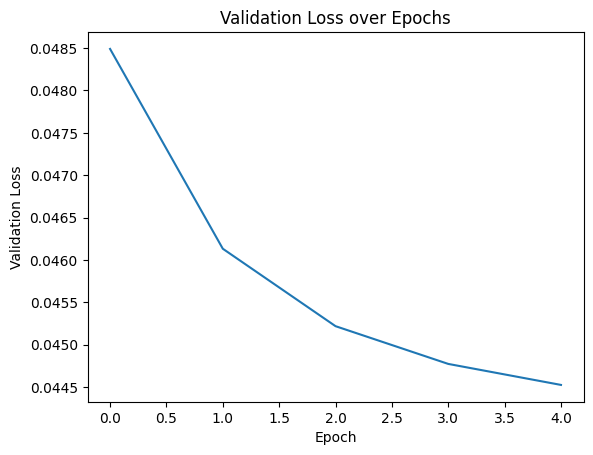

In [7]:
print("embeddings", embeddings_dict)

# Fonction pour obtenir les embeddings correspondant aux séquences
def get_embeddings(sequences, embeddings_dict):
    embeddings = []
    for sequence_id in sequences:
        embedding = embeddings_dict[sequence_id]
        print(embedding)
        embeddings.append(embedding)
    embeddings = torch.stack(embeddings)
    return embeddings

def get_embedding(sequence_id, embeddings_dict):
    return embeddings_dict[sequence_id]


# Fonction pour entraîner le modèle en utilisant la descente de gradient stochastique (SGD)
def train_model_stochastic(model, optimizer, loss_fn, sequences, conservation_scores):
    model.train()
    for i in range(len(sequences)):
        sequence_id = sequences[i]
        if i == len(sequences) - 1:
            print("sequence_id", sequence_id)
            print("embedding", embedding)
        embedding = get_embedding(sequence_id, embeddings_dict)
        #embedding_tensor = torch.tensor(embedding, dtype=torch.float32)
        label = torch.tensor(conservation_scores[i], dtype=torch.float32)

        optimizer.zero_grad()
        output = model(embedding).squeeze()

        
        loss = loss_fn(output, label)
        print("loss", loss)
        loss.backward()
        optimizer.step()
        if i == len(sequences) - 1 or False:
            print("label shape", label.shape)
            print("label", label)
            print("embedding shape", embedding.shape)
            print("embedding", embedding)
            print("output shape", output.shape)
            print("output", output)
            



# Définir les modèles de régression linéaire, Multi layer perceptron

class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


# Évaluation du modèle sur l'ensemble de validation
def evaluate_model(model, loss_fn, data_loader):
    running_loss = 0.

    with torch.no_grad():
        for i, data in enumerate(data_loader):
            inputs, labels = data

            outputs = model(inputs)

            loss = loss_fn(outputs, labels)

            running_loss += loss.item()

    return running_loss / len(data_loader)

# Configuration des hyperparamètres
learning_rate = 0.001
num_epochs = 5
batch_size = 1


# Créer l'ensemble de données
dataset = [(embeddings_dict[sequence], conservation_scores) for sequence, conservation_scores in zip(sequences, conservation_scores_tensors)]
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Créer les data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)



# Initialiser le modèle, la fonction de perte et l'optimiseur
model = LinearRegression(input_size=320)
#model = MLP(input_size=320, hidden_size=64, output_size=1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

val_losses = []
# Entraînement du modèle
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}:')
    model.train()
    train_model_stochastic(model, optimizer, loss_fn,
                           sequences, conservation_scores_tensors)

    # Validation du modèle
    model.eval()
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss) 
    #print(f'Validation Loss: {val_loss}')
# on trace la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

Epoch 1/5:
loss tensor(0.2382, grad_fn=<MseLossBackward0>)
loss tensor(0.1431, grad_fn=<MseLossBackward0>)
loss tensor(0.1136, grad_fn=<MseLossBackward0>)
loss tensor(0.1046, grad_fn=<MseLossBackward0>)
loss tensor(0.1904, grad_fn=<MseLossBackward0>)
loss tensor(0.1933, grad_fn=<MseLossBackward0>)
loss tensor(0.0560, grad_fn=<MseLossBackward0>)
loss tensor(0.0729, grad_fn=<MseLossBackward0>)
loss tensor(0.2081, grad_fn=<MseLossBackward0>)
loss tensor(0.0795, grad_fn=<MseLossBackward0>)
loss tensor(0.1226, grad_fn=<MseLossBackward0>)
loss tensor(0.2984, grad_fn=<MseLossBackward0>)
loss tensor(0.0578, grad_fn=<MseLossBackward0>)
loss tensor(0.0743, grad_fn=<MseLossBackward0>)
loss tensor(0.1392, grad_fn=<MseLossBackward0>)
loss tensor(0.0735, grad_fn=<MseLossBackward0>)
loss tensor(0.1771, grad_fn=<MseLossBackward0>)
loss tensor(0.1053, grad_fn=<MseLossBackward0>)
loss tensor(0.0587, grad_fn=<MseLossBackward0>)
loss tensor(0.1147, grad_fn=<MseLossBackward0>)
loss tensor(0.0674, grad_fn=<

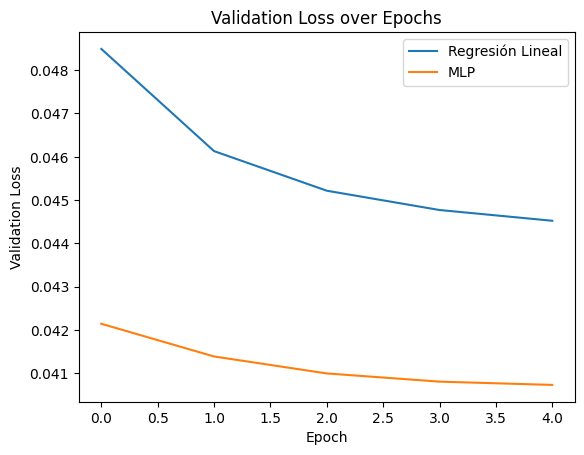

In [8]:
# Initialiser le modèle, la fonction de perte et l'optimiseur

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
#model = LinearRegression(input_size=320)
model = MLP(input_size=320, hidden_size=64, output_size=1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

val_losses_mpl = []
# Entraînement du modèle
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}:')
    model.train()
    train_model_stochastic(model, optimizer, loss_fn,
                           sequences, conservation_scores_tensors)

    # Validation du modèle
    model.eval()
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses_mpl.append(val_loss) 
    #print(f'Validation Loss: {val_loss}')
# on trace la perte de validation au fil des époques
plt.plot(val_losses, label='Regresión Lineal')
plt.plot(val_losses_mpl, label='MLP')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()